In [1]:
import pandas as pd
df = pd.read_csv('weather_by_cities.csv')

In [2]:
g = df.groupby('city')
g

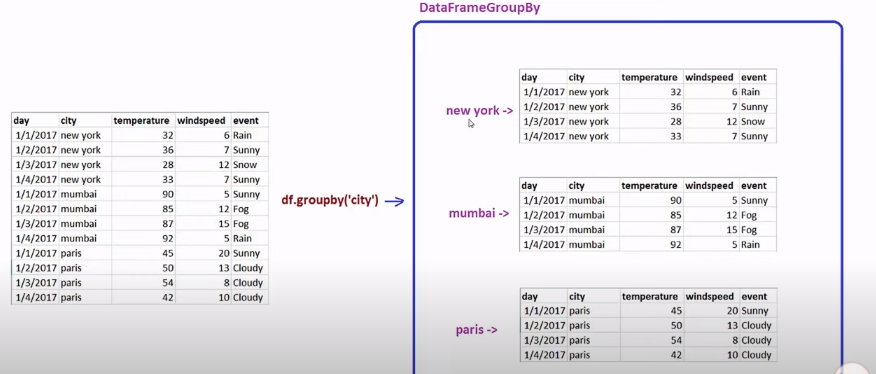

In [3]:
for city, city_df in g:
    print(city)
    print(city_df)

mumbai
        day    city  temperature  windspeed  event
4  1/1/2017  mumbai           90          5  Sunny
5  1/2/2017  mumbai           85         12    Fog
6  1/3/2017  mumbai           87         15    Fog
7  1/4/2017  mumbai           92          5   Rain
new york
        day      city  temperature  windspeed  event
0  1/1/2017  new york           32          6   Rain
1  1/2/2017  new york           36          7  Sunny
2  1/3/2017  new york           28         12   Snow
3  1/4/2017  new york           33          7  Sunny
paris
         day   city  temperature  windspeed   event
8   1/1/2017  paris           45         20   Sunny
9   1/2/2017  paris           50         13  Cloudy
10  1/3/2017  paris           54          8  Cloudy
11  1/4/2017  paris           42         10  Cloudy


In [5]:
df.groupby('city').mean('temperature')

,temperature,windspeed
city,,
mumbai,88.50,9.25
new york,32.25,8.00
paris,47.75,12.75


In [8]:
g=df.groupby(['city','event'])

In [9]:
for city_event, city_event_df in g:
    print(city_event)
    print(city_event_df)

('mumbai', 'Fog')
        day    city  temperature  windspeed event
5  1/2/2017  mumbai           85         12   Fog
6  1/3/2017  mumbai           87         15   Fog
('mumbai', 'Rain')
        day    city  temperature  windspeed event
7  1/4/2017  mumbai           92          5  Rain
('mumbai', 'Sunny')
        day    city  temperature  windspeed  event
4  1/1/2017  mumbai           90          5  Sunny
('new york', 'Rain')
        day      city  temperature  windspeed event
0  1/1/2017  new york           32          6  Rain
('new york', 'Snow')
        day      city  temperature  windspeed event
2  1/3/2017  new york           28         12  Snow
('new york', 'Sunny')
        day      city  temperature  windspeed  event
1  1/2/2017  new york           36          7  Sunny
3  1/4/2017  new york           33          7  Sunny
('paris', 'Cloudy')
         day   city  temperature  windspeed   event
9   1/2/2017  paris           50         13  Cloudy
10  1/3/2017  paris           54    

In [13]:
India_weather = pd.DataFrame({
    'city': ['Mumbai', 'Delhi', 'Banglore'],
    'Temperature': [32,45,37],
    'Humidity':[80,60,70]
})

US_weather = pd.DataFrame({
    'city': ['NY', 'Texas', 'Michigan'],
    'Temperature': [27,43,45],
    'Humidity':[85,69,73]
})

In [15]:
df = pd.concat([India_weather, US_weather])

In [16]:
df

,city,Temperature,Humidity
0,Mumbai,32,80
1,Delhi,45,60
2,Banglore,37,70
0,NY,27,85
1,Texas,43,69
2,Michigan,45,73


In [17]:
df = pd.concat([India_weather, US_weather],ignore_index=True)

In [18]:
df

,city,Temperature,Humidity
0,Mumbai,32,80
1,Delhi,45,60
2,Banglore,37,70
3,NY,27,85
4,Texas,43,69
5,Michigan,45,73


In [19]:
df = pd.concat([India_weather, US_weather],keys=['India','US'])

In [20]:
df

city  Temperature  Humidity
India 0    Mumbai           32        80
      1     Delhi           45        60
      2  Banglore           37        70
US    0        NY           27        85
      1     Texas           43        69
      2  Michigan           45        73

In [21]:
df.loc['India']

,city,Temperature,Humidity
0,Mumbai,32,80
1,Delhi,45,60
2,Banglore,37,70


In [22]:
temp_df = pd.DataFrame({
    'city': ['Mumbai', 'Delhi', 'Banglore'],
    'Temperature': [32,45,37]
})

windspeed_df = Temp_df = pd.DataFrame({
    'city': ['Mumbai', 'Delhi', 'Banglore'],
    'Windspeed': [32,45,37]
})

In [23]:
temp_df

,city,Temperature
0,Mumbai,32
1,Delhi,45
2,Banglore,37


In [25]:
windspeed_df

,city,Windspeed
0,Mumbai,32
1,Delhi,45
2,Banglore,37


In [26]:
df = pd.concat([temp_df,windspeed_df], axis=1)

In [27]:
df

,city,Temperature,city,Windspeed
0,Mumbai,32,Mumbai,32
1,Delhi,45,Delhi,45
2,Banglore,37,Banglore,37


In [28]:
s = pd.Series(['Humid', 'Dry', 'Rainy'], name='event')

In [29]:
pd.concat([temp_df, s], axis=1)

,city,Temperature,event
0,Mumbai,32,Humid
1,Delhi,45,Dry
2,Banglore,37,Rainy


#### Merge df

In [30]:
df1 = pd.DataFrame({
    'city': ['Mumbai', 'Delhi', 'Banglore'],
    'Windspeed': [32,45,37]
})


df2 = pd.DataFrame({
    'city': ['Mumbai', 'Delhi', 'Banglore'],
    'Humidity': [90,77,69]
})

In [33]:
df = pd.merge(df1,df2,on='city')
df

,city,Windspeed,Humidity
0,Mumbai,32,90
1,Delhi,45,77
2,Banglore,37,69


,city,Windspeed,Humidity
0,Mumbai,32,90
1,Delhi,45,77
2,Banglore,37,69


In [34]:
df1 = pd.DataFrame({
    'city': ['Mumbai', 'Delhi', 'Banglore','Jaipur'],
    'Windspeed': [32,45,37,44]
})


df2 = pd.DataFrame({
    'city': ['Mumbai', 'Delhi', 'Banglore', 'Chennai'],
    'Humidity': [90,77,69,95]
})

In [36]:
df = pd.merge(df1,df2,on='city')
df

,city,Windspeed,Humidity
0,Mumbai,32,90
1,Delhi,45,77
2,Banglore,37,69


In [38]:
df = pd.merge(df1,df2,on='city',how='left')
df

,city,Windspeed,Humidity
0,Mumbai,32,90.0
1,Delhi,45,77.0
2,Banglore,37,69.0
3,Jaipur,44,NaN


In [39]:
df = pd.merge(df1,df2,on='city',how='outer')
df

,city,Windspeed,Humidity
0,Mumbai,32.0,90.0
1,Delhi,45.0,77.0
2,Banglore,37.0,69.0
3,Jaipur,44.0,NaN
4,Chennai,NaN,95.0


In [40]:
df3 = pd.DataFrame({
    'city': ['Mumbai', 'Delhi', 'Banglore'],
    'Temperature': [45,50,37],
    'Humidity':[80,60,70]
})


In [41]:
df4 = pd.merge(df,df3, on='city')
df4

In [43]:
df4 = pd.merge(df,df3, on='city',suffixes=('_left','_right'))
df4

,city,Windspeed,Humidity_left,Temperature,Humidity_right
0,Mumbai,32.0,90.0,32,80
1,Delhi,45.0,77.0,45,60
2,Banglore,37.0,69.0,37,70
